In [1]:
"""
Random Forest Regression on the California Housing Dataset

This script demonstrates an end-to-end workflow for regression using a Random Forest
to predict median house values from the California Housing dataset. It includes:
    - Data loading and train–test split
    - Model training and evaluation (R², MSE)
    - Multiple fresh visualizations:
         • Scatter Plot of Predicted vs. Actual Values
         • Residual Plot
         • Feature Importance Bar Chart
         • Partial Dependence Plot for Median Income

The code is written sequentially with a new coding style and visual approach.
"""

# ---------------------------------
# Step 1: Import Required Libraries
# ---------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.inspection import PartialDependenceDisplay

In [4]:
# ---------------------------------
# Step 2: Set Visualization Style
# ---------------------------------
# Using 'seaborn-darkgrid' for a fresh, clear look
plt.style.use("seaborn-v0_8-darkgrid")
sns.set_theme(style="darkgrid", palette="muted")

In [5]:
# ---------------------------------
# Step 3: Load the California Housing Dataset
# ---------------------------------
# Fetch the dataset as a pandas DataFrame
data = fetch_california_housing(as_frame=True)
df = data.frame
print("Dataset shape:", df.shape)
print("Dataset columns:", df.columns.tolist())

Dataset shape: (20640, 9)
Dataset columns: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal']


In [6]:
print('Preview Dataset')
df.head()

Preview Dataset


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
# ---------------------------------
# Step 4: Define Features and Target
# ---------------------------------
# The target is the median house value ("MedHouseVal")
X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]

In [8]:
# ---------------------------------
# Step 5: Split Data into Training and Testing Sets
# ---------------------------------
# Using a 70/30 split for unbiased evaluation
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (14448, 8)
Testing set shape: (6192, 8)


In [9]:
# ---------------------------------
# Step 6: Train a Random Forest Regressor
# ---------------------------------
# Initialize with 100 trees and a fixed random state for reproducibility
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [10]:
# ---------------------------------
# Step 7: Make Predictions and Evaluate the Model
# ---------------------------------
y_pred = rf.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("R^2 Score:", r2)
print("Mean Squared Error:", mse)

R^2 Score: 0.8045734925119942
Mean Squared Error: 0.25650512920799395


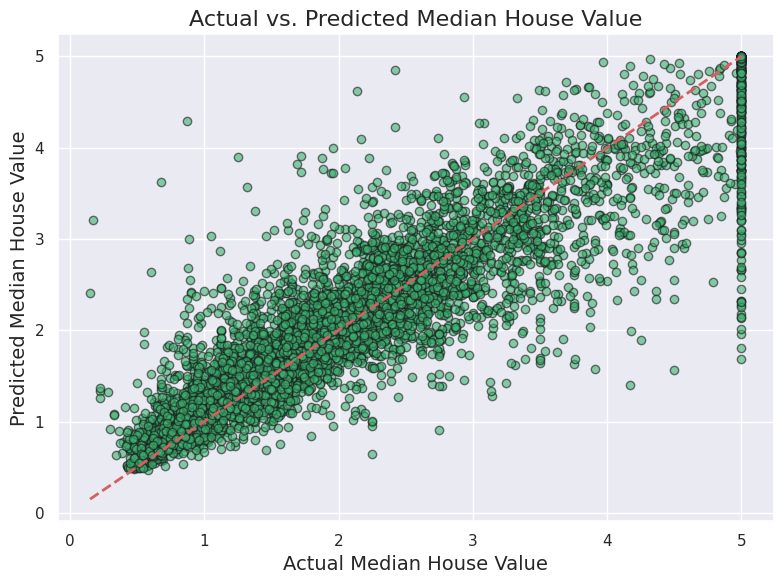

In [11]:
# ---------------------------------
# Step 8: Visualization - Scatter Plot of Predicted vs. Actual Values
# ---------------------------------
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color="mediumseagreen", edgecolor="k")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2)
plt.xlabel("Actual Median House Value", fontsize=14)
plt.ylabel("Predicted Median House Value", fontsize=14)
plt.title("Actual vs. Predicted Median House Value", fontsize=16)
plt.tight_layout()
plt.show()


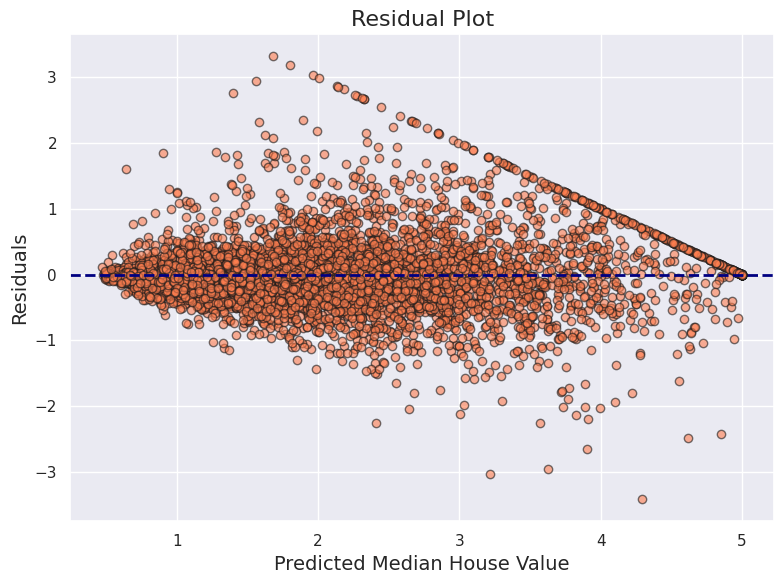

In [12]:
# ---------------------------------
# Step 9: Visualization - Residual Plot
# ---------------------------------
# Compute residuals (difference between actual and predicted values)
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, alpha=0.6, color="coral", edgecolor="k")
plt.axhline(y=0, color="navy", linestyle="--", lw=2)
plt.xlabel("Predicted Median House Value", fontsize=14)
plt.ylabel("Residuals", fontsize=14)
plt.title("Residual Plot", fontsize=16)
plt.tight_layout()
plt.show()

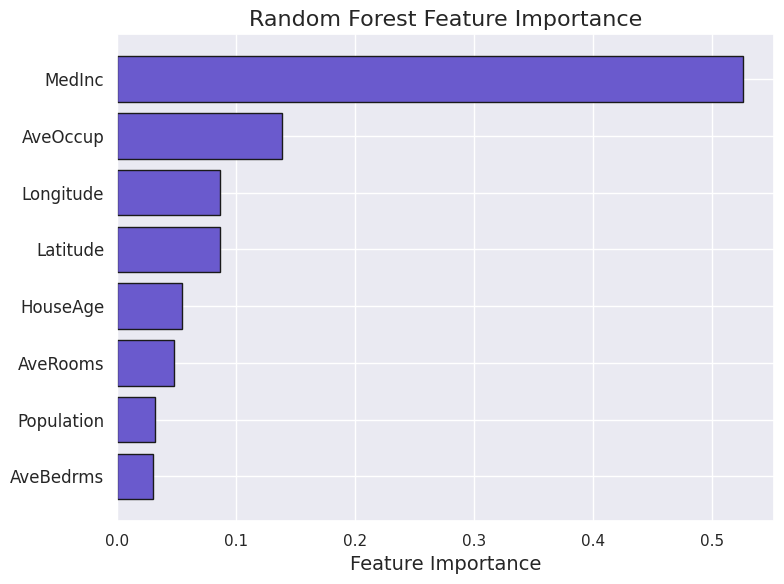

In [13]:
# ---------------------------------
# Step 10: Visualization - Feature Importance Bar Chart
# ---------------------------------
# Get feature importances from the trained model
importances = rf.feature_importances_
features = X.columns
# Sort features by importance
indices = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.barh(range(len(features)), importances[indices], color="slateblue", edgecolor="k")
plt.yticks(range(len(features)), [features[i] for i in indices], fontsize=12)
plt.xlabel("Feature Importance", fontsize=14)
plt.title("Random Forest Feature Importance", fontsize=16)
plt.tight_layout()
plt.show()

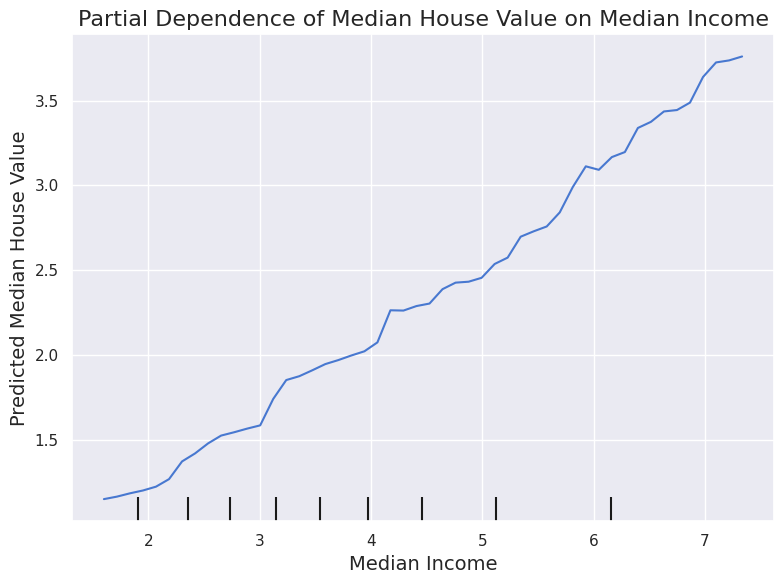

In [14]:
# ---------------------------------
# Step 11: Visualization - Partial Dependence Plot for "MedInc"
# ---------------------------------
# "MedInc" (median income) is a key predictor in the dataset.
fig, ax = plt.subplots(figsize=(8,6))
PartialDependenceDisplay.from_estimator(rf, X_train, ["MedInc"], ax=ax, grid_resolution=50)
plt.title("Partial Dependence of Median House Value on Median Income", fontsize=16)
plt.xlabel("Median Income", fontsize=14)
plt.ylabel("Predicted Median House Value", fontsize=14)
plt.tight_layout()
plt.show()